In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [98]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [99]:
df.shape

(891, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: xlabel='Survived', ylabel='count'>

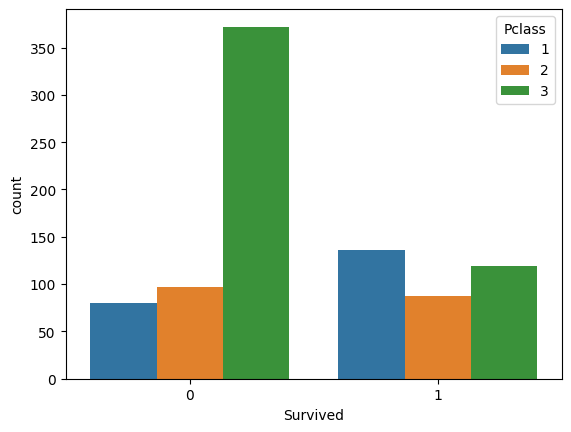

In [103]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

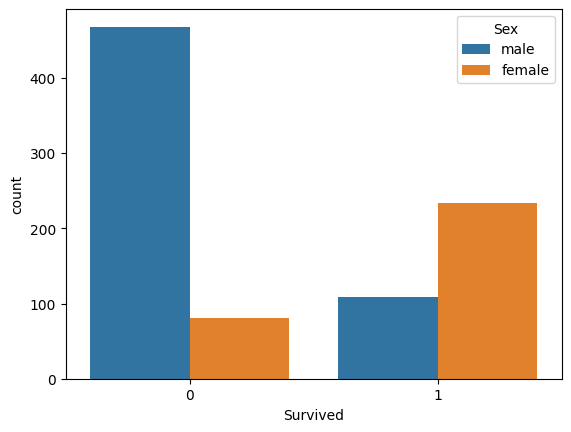

In [104]:
sns.countplot(x="Survived",hue="Sex",data=df)

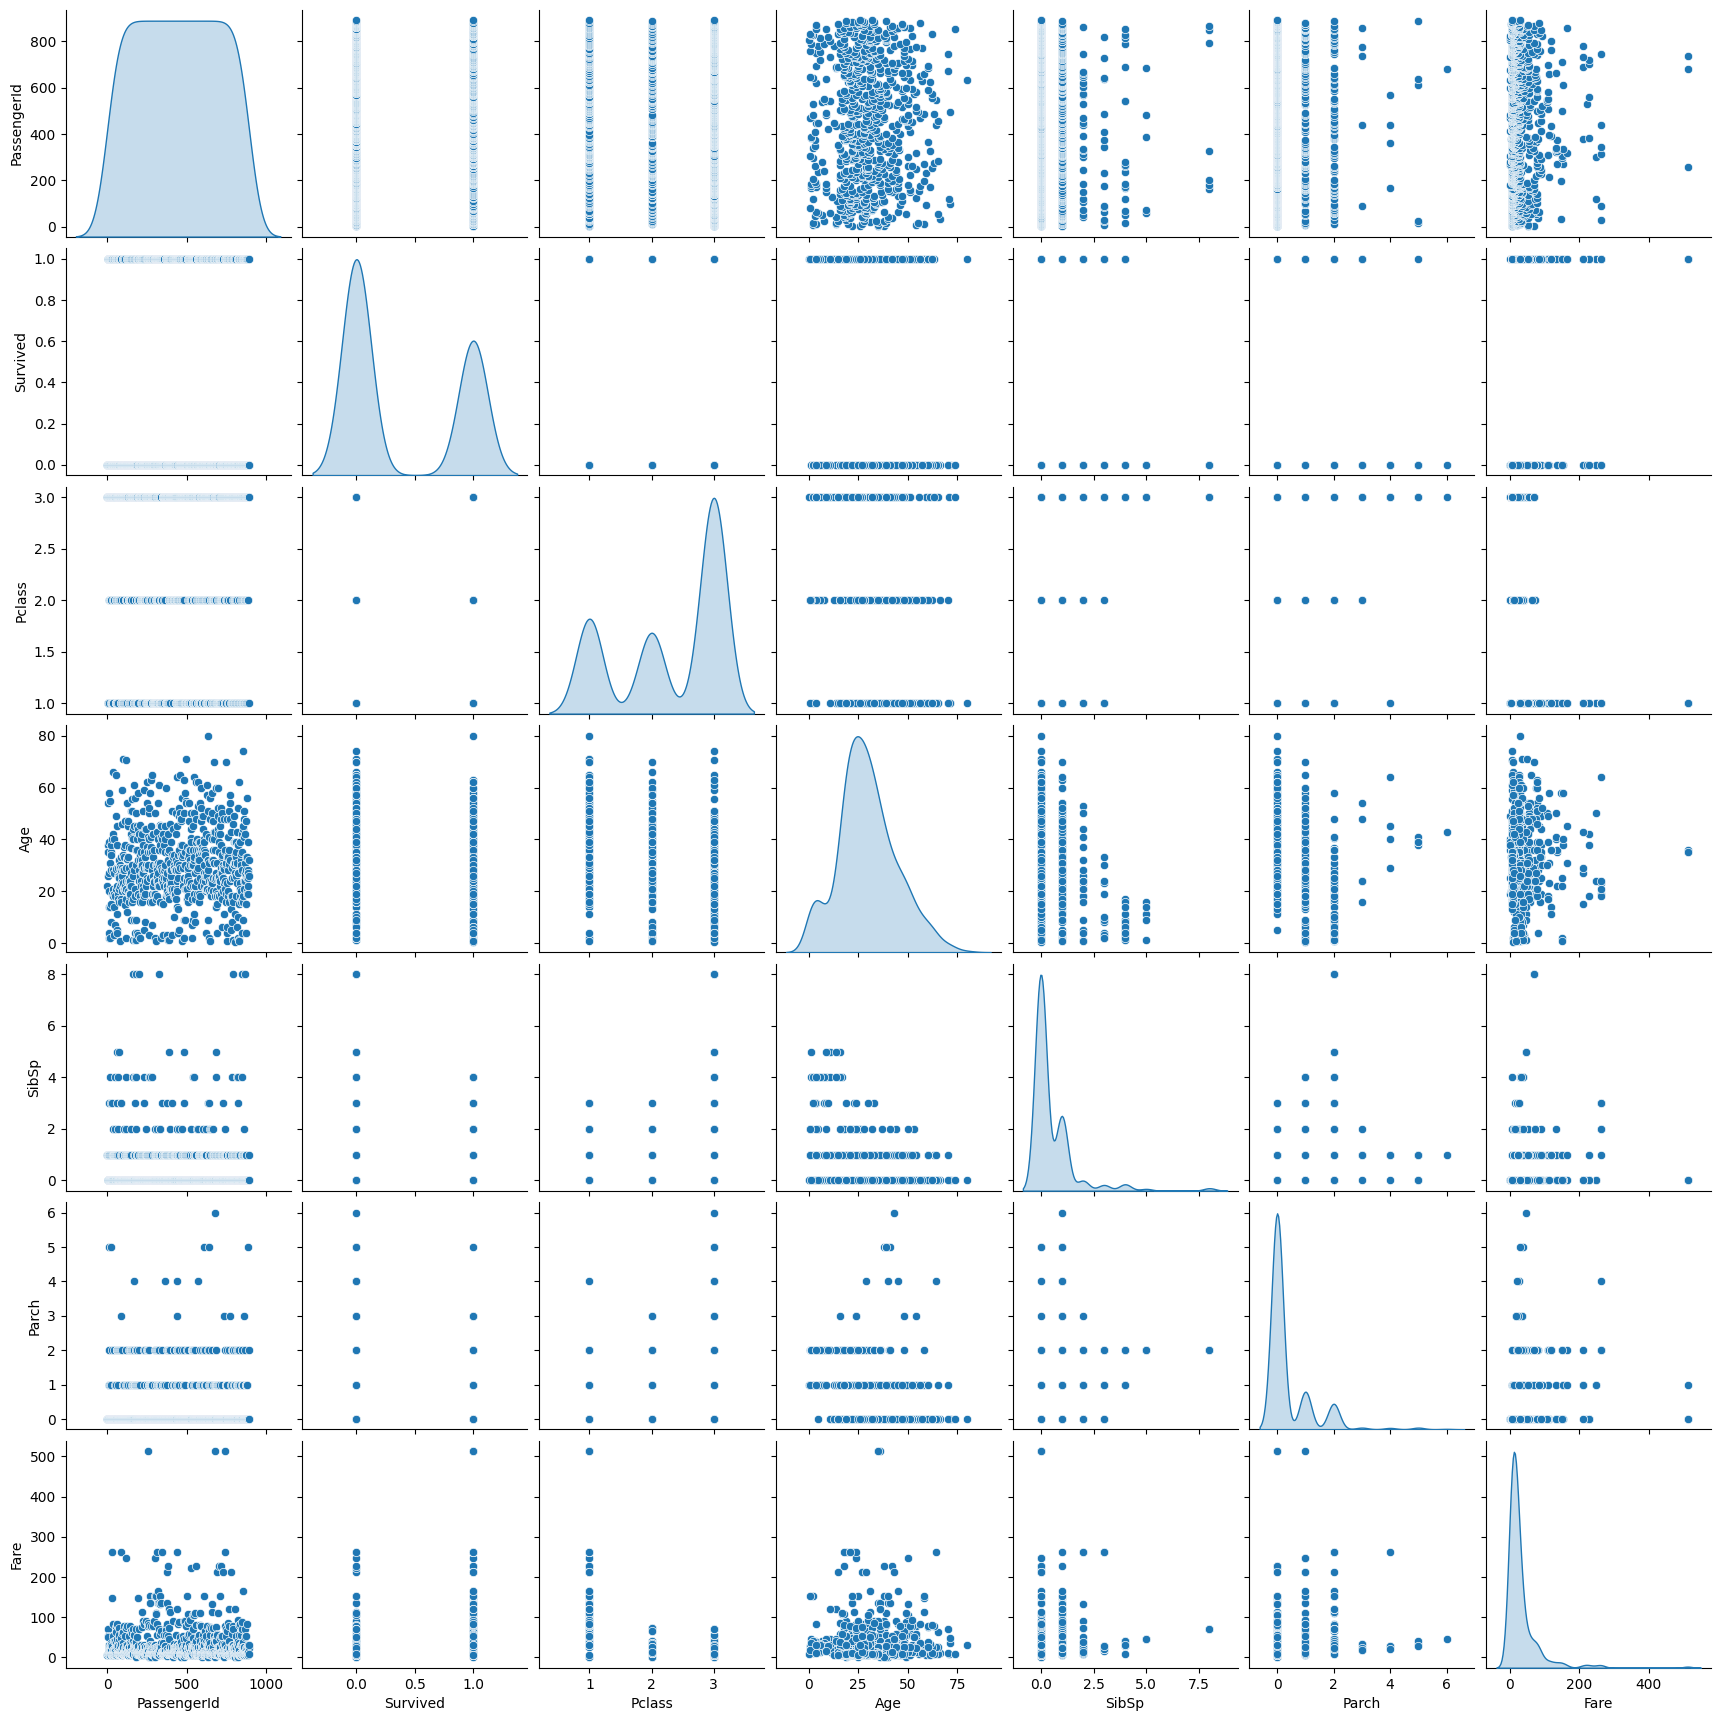

In [42]:
sns.pairplot(df,diag_kind="kde")

In [105]:
df.drop("Cabin",axis=1,inplace=True)

In [106]:
df.shape

(891, 11)

In [107]:
median=df["Age"].median()
df["Age"]=df["Age"].replace(np.nan,median)

In [108]:
mode=df["Embarked"].mode().values[0]
mode

'S'

In [109]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode)

In [110]:
dummies=pd.get_dummies(df[["Sex","Pclass","Embarked"]])
dummies.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1


In [114]:
df=pd.concat([df,dummies],axis=1)

In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,3,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,3,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,0,0,1,2,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,1,1,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,0,0,1,3,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,1,0,0,1,0,1,1,0,0


In [116]:
df.drop(["Name","Ticket","Fare","Sex","Pclass","Embarked"],axis=1,inplace=True)

In [117]:
X=df.drop(["Survived"],axis=1)
Y=df[["Survived"]]

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [122]:
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

C:\Users\digan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [120]:
model_1.score(X_train,Y_train)

0.8057784911717496

In [121]:
model_1.score(X_test,Y_test)

0.7574626865671642

In [123]:
df.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [124]:
from sklearn import metrics

In [128]:
predictions=model_1.predict(X_test)

In [129]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       168
           1       0.69      0.63      0.66       100

    accuracy                           0.76       268
   macro avg       0.74      0.73      0.74       268
weighted avg       0.75      0.76      0.75       268



In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[140,  28],
       [ 37,  63]], dtype=int64)

<AxesSubplot: >

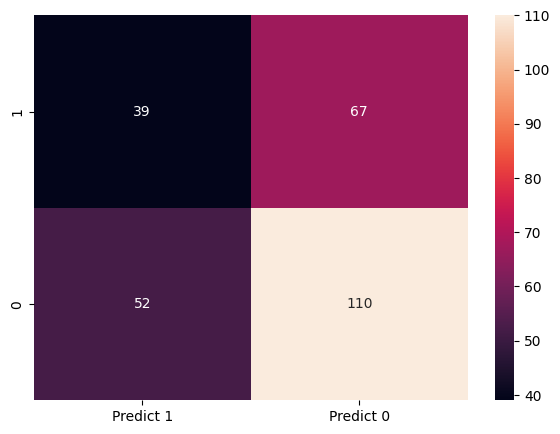

In [133]:
#heat map of confusion matrix
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')